# Day2: EDA & Preprocessing

# EDA: Experimental Data Analysis

**Exploratory Data Analysis (EDA)** is the process of analyzing and summarizing the main characteristics of a dataset using statistical and visualization techniques. It helps you understand the data's structure, detect patterns, spot anomalies, and determine relationships among variables.

In [4]:
!ls ../data

auto-mpg.csv	   DARWIN.csv	    heart_disease_uci.csv  heart_y_test.csv
Concrete_Data.csv  forestfires.csv  heart_X_test.csv	   heart_y_train.csv
countries.csv	   heart.csv	    heart_X_train.csv	   test.txt


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a Pandas DataFrame
#df = pd.read_csv('../data/forestfires.csv')
#df = pd.read_csv('../data/Concrete_Data.csv')
df = pd.read_csv('../data/DARWIN.csv')

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [15]:
# View the first few rows of the dataset
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [16]:
# Get information about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [17]:
# Get summary statistics of numeric columns
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [18]:
# Check for missing values
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [31]:
df.shape

(1030, 9)

In [19]:
# Drop duplicates if necessary
df.drop_duplicates(inplace=True)

## Univariate Analysis

In [21]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [2]:
# Age Distribution
plt.figure(figsize=(8, 6))
df['Concrete compressive strength(MPa, megapascals) '].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('strength Distribution')
plt.xlabel('strength')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
df['Concrete compressive strength(MPa, megapascals) '].hist(bins=500, color='skyblue', edgecolor='black')
plt.title('strength Distribution')
plt.xlabel('strength')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
df['Concrete compressive strength(MPa, megapascals) '].hist(bins=1000, color='skyblue', edgecolor='black')
plt.title('strength Distribution')
plt.xlabel('strength')
plt.ylabel('Frequency')
plt.show()

# Chest Pain Type Frequency
plt.figure(figsize=(8, 6))
df['Concrete compressive strength(MPa, megapascals) '].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('strength Distribution')
plt.xlabel('cnt')
plt.ylabel('strength')
plt.show()

NameError: name 'plt' is not defined

## Bivariate Analysis

In [2]:
df.columns

Index(['ID', 'air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
       'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1',
       ...
       'mean_jerk_in_air25', 'mean_jerk_on_paper25', 'mean_speed_in_air25',
       'mean_speed_on_paper25', 'num_of_pendown25', 'paper_time25',
       'pressure_mean25', 'pressure_var25', 'total_time25', 'class'],
      dtype='object', length=452)

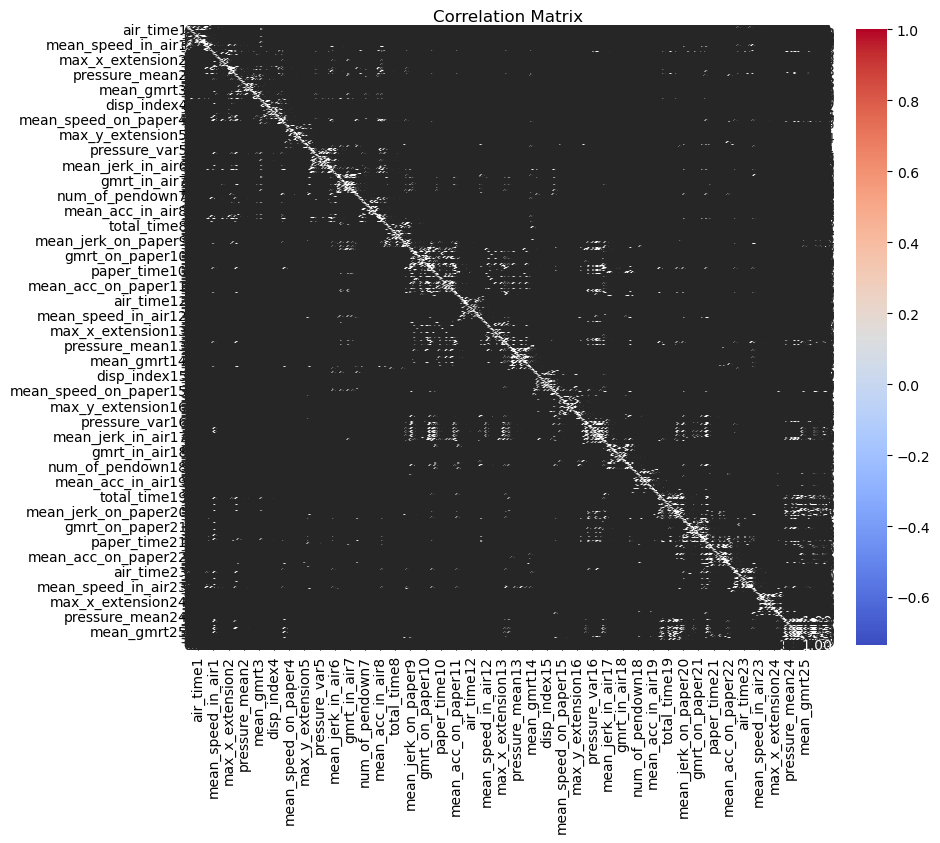

KeyError: 'Cement (component 1)(kg in a m^3 mixture)'

<Figure size 800x600 with 0 Axes>

In [3]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Age vs Cholesterol
plt.figure(figsize=(8, 6))
plt.scatter(df['Cement (component 1)(kg in a m^3 mixture)'], df['Concrete compressive strength(MPa, megapascals) '], alpha=0.2, edgecolor='k')
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

# Age vs Cholesterol
plt.figure(figsize=(8, 6))
plt.scatter(df['Age (day)'], df['Concrete compressive strength(MPa, megapascals) '], alpha=0.2, edgecolor='k')
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

## Grouped Analysis

/tmp/ipykernel_23345/332346775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cement (component 1)(kg in a m^3 mixture)', y='Concrete compressive strength(MPa, megapascals) ', data=df, palette='Set2')


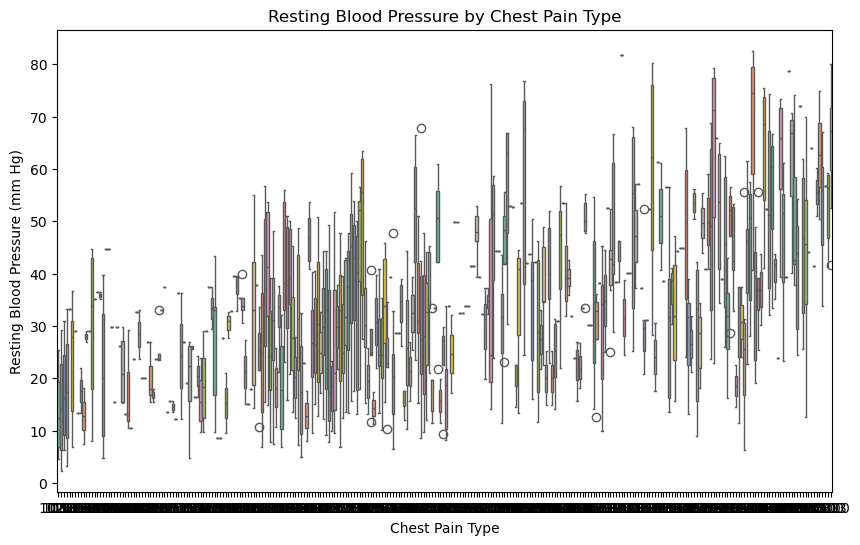

In [40]:
# Resting Blood Pressure by Chest Pain Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='ChestPainType', y='RestingBP', data=df, palette='Set2')
plt.title('Resting Blood Pressure by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

## Outlier Detection

In [ ]:
# Box Plot for Cholesterol
plt.figure(figsize=(8, 6))
sns.boxplot(y='Cholesterol', data=df, color='lightblue')
plt.title('Cholesterol Distribution and Outliers')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

## Patterns and Anomalies

In [ ]:
# Exercise-Induced Angina by Heart Disease Status
plt.figure(figsize=(8, 6))
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df, palette='pastel')
plt.title('Exercise-Induced Angina by Heart Disease Status')
plt.xlabel('Exercise Angina')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

# Preprocessing

Preprocessing is an essential step of the machine learning workflow and important for the performance of models. This notebook will introduce the major steps of preprocessing for machine learning. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv('../data/heart.csv')
# Check out the first few rows
data.head()

Below is a "data dictionary", containing information about each of the variables in the dataset.

| Feature           | Data Type                    | Description                                                                                                         |
|-------------------|-----------------------------|---------------------------------------------------------------------------------------------------------------------|
| **Age**           | continuous                 | Age of the patient in years                                                                                        |
| **Sex**           | binary discrete (M/F)      | Sex of the patient: M = Male, F = Female                                                                           |
| **ChestPainType** | multi-valued discrete (TA, ATA, NAP, ASY) | Type of chest pain: TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic         |
| **RestingBP**     | continuous                 | Resting blood pressure measured in mm Hg                                                                           |
| **Cholesterol**   | continuous                 | Serum cholesterol level measured in mg/dl                                                                          |
| **FastingBS**     | binary discrete (0/1)      | Fasting blood sugar: 1 = Fasting blood sugar > 120 mg/dl, 0 = Fasting blood sugar ≤ 120 mg/dl                      |
| **RestingECG**    | multi-valued discrete (Normal, ST, LVH) | Resting electrocardiogram results: Normal = Normal, ST = ST-T wave abnormality, LVH = Left ventricular hypertrophy |
| **MaxHR**         | continuous                 | Maximum heart rate achieved, numeric value between 60 and 202                                                      |
| **ExerciseAngina**| binary discrete (Y/N)      | Presence of exercise-induced angina: Y = Yes, N = No                                                               |
| **Oldpeak**       | continuous                 | Depression of the ST segment measured in numeric value (Oldpeak)                                                   |
| **ST_Slope**      | multi-valued discrete (Up, Flat, Down) | Slope of the peak exercise ST segment: Up = upsloping, Flat = flat, Down = downsloping                            |
| **HeartDisease**  | binary discrete (0/1)      | Output class indicating heart disease: 1 = Presence of heart disease, 0 = Normal                                  |

## Exploratory Data Analysis

Let's start by getting familiar with our data. This is an important first step before jumping into any modeling.

How many samples in the dataset do we have?

In [ ]:
data.shape

This is a pretty small dataset.

Let's look at the distribution of the target variable:

In [ ]:
ax = data['Age'].hist(grid=False, bins=np.linspace(1, 100, 20))
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.show()

How about how the age correlates with the predictors? We can use the `corr()` function to do this:

In [ ]:
data.corr(numeric_only=True)

---
### Challenge 1: More EDA

Create the following plots, or examine the following distributions, while exploring your data:

1. What are column names of this data frame?
2. A histogram of the continuous variables.
3. What are the unique values of `ExerciseAngina`, and their counts?
6. What are the unique `ChestPainType` values, and their counts?

---

# What would be a good machine learning question for this data set?

# Creating Train and Test Splits

Next, we'll want to split our dataset into training and test data. When creating the model, we need to make sure it only sees the training data. Then, we can examine how well it **generalizes** to data it hasn't seen before. The train and test split is a foundational concept in machine learning. Be sure you're confident you understand why we do this before moving forward!

A dataset is often broken up into a feature set, or **design matrix** (typically with the variable name `X`) as well as the target or response variable `y`. Both have $D$ samples, but the design matrix will have a second dimension indicating the number of features we're using for prediction.

In this case, we'll extract the output variable `RestingBP` from the data frame to make the `X` and `y` variables. We use a capital `X` to denote it is a `matrix` or 2-D array, and use a lowercase `y` to denote that it is a `vector`, or 1-D array.

In [ ]:
# Remove the response variable and car name
X = data.drop(columns=['RestingBP'])
# Assign response variable to its own variable
y = data['RestingBP'].astype(np.float64)
# Confidence check
print(X.shape)
print(y.shape)

Now, we perform the train/test split. The package `scikit-learn` is the most commonly used package for machine learning in Python. It provides a function we can easily use to perform this split. Let's import it:

In [ ]:
from sklearn.model_selection import train_test_split

We commonly do an 80/20 split, where 80% of the data is used for training, and the remaining 20% is used for testing. We can customize this using the parameters of the `train_test_split` function, which you can find in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

We typically split the data randomly. However, sometimes we want this random split to occur in a *reproducible* fashion. This might be when we're testing our code, and want the same random split every time. Or, during a workshop, when we want all participants to get the same split, so that the results look the same for everyone. A reproducible random fit can be done by setting the `random_state`, which is an input argument to `train_test_split`. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
print(f'X train shape: {X_train.shape}; y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}; y test shape: {y_test.shape}')

BEFORE we split the data, there are certain preprocessing tasks we need to do. ORDER MATTERS!

## Missing Data Preprocessing

First, let's check to see if there are any missing values in the data set. Missing values are represented by `NaN`. 

**Question:** In this case, what do missing values stand for?

In [ ]:
data.isnull().sum()

There is no `NaN` missing values. Is this great?

In [ ]:
data['Sex'].unique()

In [ ]:
data['Age'].unique()

In [ ]:
data['RestingBP'].unique()

In [ ]:
data['Cholesterol'].unique()

In this case, the `0` represents a missing value, so let's replace those with `np.nan` objects.

In [ ]:
data.columns

In [ ]:
#data[['RestingBP', 'Cholesterol']]
data['RestingBP'].replace(0, np.nan, inplace=True)
data['RestingBP'].unique()

data['Cholesterol'].replace(0, np.nan, inplace=True)
data['Cholesterol'].unique()

### Imputation

In the case of missing values, we have the option to fill in the missing values with the best guess. This is called **imputation**. Here we'll impute any missing values using the average, or mean, of all the data that does exist, as that's the best guess for a data point if all we have is the data itself. To do that we'll use the `SimpleImputer` to assign the mean to all missing values in the data.

There are also other strategies that can be used to impute missing data ([see documentation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)).

Let's see how the `SimpleImputer` works on a subset of the data. 

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,
                        strategy='mean', 
                        copy=True)
imputed = imputer.fit_transform(data[['RestingBP','Cholesterol']])

Now let's check that the previously null values have been filled in. 

In [ ]:
print(imputed[data[data['RestingBP'].isna()].index])

### Dropping Null Values

Another option option is to use `pd.dropna()` to drop `Null` values from the `DataFrame`. This should almost always be used with the `subset` argument which restricts the function to only dropping values that are null in a certain column(s).

In [ ]:
data = data.dropna(subset='Sex')

# Now this line will return an empty dataframe
data[data['Sex'].isna()]

## Categorical Data Processing

`Heart disease` dataset contains both categorical and continuous features, which will each need to be preprocessed in different ways. First, we want to transform the categorical variables from strings to **indicator variables**. Indicator variables have one column per level, For example, the island variable will change from ATA/NAP/ASY/TA --> ATA (1/0), NAP (1/0), ASY (1/0), and TA (1/0). For each set of indicator variables, there should be a 1 in exactly one column.

In [ ]:
data['ST_Slope'].unique()

In [ ]:
data.dtypes

 Let's make a list of the categorical variable names to be transformed into indicator variables.

In [ ]:
# Define the variable names that are categorical for use later
cat_var_names = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
data_cat = data[cat_var_names]
data_cat.head()

### Categorical Variable Encoding (One-hot & Dummy)

Many machine learning algorithms require that categorical data be encoded numerically in some fashion. There are two main ways to do so:


- **One-hot-encoding**, which creates `k` new variables for a single categorical variable with `k` categories (or levels), where each new variable is coded with a `1` for the observations that contain that category, and a `0` for each observation that doesn't. 
- **Dummy encoding**, which creates `k-1` new variables for a categorical variable with `k` categories

However, when using some machine learning algorithms we can run into the so-called ["Dummy Variable Trap"](https://www.algosome.com/articles/dummy-variable-trap-regression.html) when using One-Hot-Encoding on multiple categorical variables within the same set of features. This occurs because each set of one-hot-encoded variables can be added together across columns to create a single column of all `1`s, and so are multi-colinear when multiple one-hot-encoded variables exist within a given model. This can lead to misleading results. 

To resolve this, we can simply add an intercept term to our model (which is all `1`s) and remove the first one-hot-encoded variable for each categorical variables, resulting in `k-1` so-called "Dummy Variables". 

Luckily the `OneHotEncoder` from `sklearn` can perform both one-hot and dummy encoding simply by setting the `drop` parameter (`drop = 'first'` for Dummy Encoding and `drop = None` for One Hot Encoding). 

**Question:** How many total columns will there be in the output?

In [ ]:
from sklearn.preprocessing import OneHotEncoder
dummy_e = OneHotEncoder(categories='auto', drop='first', sparse_output=False)
dummy_e.fit(data_cat);
dummy_e.categories_

In [ ]:
temp = dummy_e.transform(data_cat)

## Continuous Data Preprocessing

For numeric data, we don't need to create indicator variables, instead we need to normalize our variables, which helps improve performance of many machine learning models.

 Let's make subset out the continuous variables to be normalized.

In [ ]:
data_num = data.drop(columns=cat_var_names + ['HeartDisease'])
data_num.head()

### Normalization

[Normalization](https://en.wikipedia.org/wiki/Normalization_(statistics)) is a transformation that puts data into some known "normal" scale. We use normalization to improve the performance of many machine learning algorithms (see [here](https://en.wikipedia.org/wiki/Feature_scaling)). There are many forms of normalization, but perhaps the most useful to machine learning algorithms is called the "z-score" also known as the standard score. 

To z-score normalize the data, we simply subtract the mean of the data, and divide by the standard deviation. This results in data with a mean of `0` and a standard deviation of `1`.

We'll use the `StandardScaler` from `sklearn` to do normalization.

In [1]:
from sklearn.preprocessing import StandardScaler
norm_e = StandardScaler()
norm_e.fit_transform(norm_e.fit_transformata_num,).mean(axis=0)

NameError: name 'data_num' is not defined

To check the normalization works, let's look at the mean and standard variation of the resulting columns. 

**Question:** What should the mean and std variation be?

In [ ]:
print('mean:',norm_e.fit_transform(data_num,).mean(axis=0))
print('std:',norm_e.fit_transform(data_num,).std(axis=0))

---
## Challenge 1: Fitting preprocessing functions

The simple imputer, normalization and one-hot-encoding rely on sklearn functions that are fit to a data set. 

1) What is being fit for each of the three functions?
    1) One Hot Encoding
    2) Standard Scaler
    3) Simple Imputer
 
> A. One Hot Encoding changes the non-numeral values into numeral values

> B. Standard Scaler scales the value into simmilar forms

> C. 

When we are preprocessing data we have a few options: 
1) Fit on the whole data set
2) Fit on the training data
3) Fit on the testing data

Which of the above methods would you use and why?

> 1) - the values should match?
---


## Combine it all together

Now let's combine what we've learned to preprocess the entire dataset.

First we will reload the data set to start with a clean copy.

In [ ]:
data = pd.read_csv('../data/heart.csv')
data['RestingBP'].replace(0, np.nan, inplace=True)
data['Cholesterol'].replace(0, np.nan, inplace=True)

In [ ]:
data.columns

In [ ]:
# Perform the train-test split
y = data['HeartDisease']
X = data.drop('HeartDisease', axis =1, inplace=False)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20, stratify=y)
print(X_train.shape)

We want to train our imputers on the training data using `fit_transform`, then `transform` the test data. This more closely resembles what the workflow would look like if you are bringing in brand new test data.

First, we will subset out the categorical and numerical features separately. 

In [ ]:
# Get the categorical and numerical variable column indices
cat_var = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
num_var = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
# Splice the training array
X_train_cat = X_train[cat_var]
X_train_num = X_train[num_var]

# Splice the test array
X_test_cat = X_test[cat_var]
X_test_num = X_test[num_var]

Now, let's process the categorical data with **Dummy encoding**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Categorical feature encoding
X_train_dummy = dummy_e.fit_transform(X_train_cat)
X_test_dummy = dummy_e.transform(X_test_cat)


# Check the shape
X_train_dummy.shape, X_test_dummy.shape

Now, let's process the numerical data by imputing any missing values and normalizing the results.

In [ ]:
# Numerical feature standardization

# Impute the data
X_train_imp = imputer.fit_transform(X_train_num)
X_test_imp = imputer.transform(X_test_num)

# Check for missing values
np.isnan(X_train_imp).any(), np.isnan(X_test_imp).any()

# normalize
X_train_norm = norm_e.fit_transform(X_train_imp)
X_test_norm = norm_e.transform(X_test_imp)

X_train_norm.shape, X_test_norm.shape

Now that we've processed the numerical and categorical data separately, we can put the two arrays back together.

In [ ]:
X_train = np.hstack((X_train_dummy, X_train_norm))
X_test = np.hstack((X_test_dummy, X_test_norm))

X_train.shape, X_test.shape

In [ ]:
dummy_e.get_feature_names_out()

In [ ]:
X_train

---
## Challenge 2: Order of Preprocessing

In the preprocessing we did the following steps: 

1) Null values
2) One-hot-encoding
3) Imputation
4) Normalization

Now, consider that we change the order of the steps in the following ways. What effect might that have on the algorithms?
**Hint**: Try copying the code from above and trying it out!

- One-Hot-Encoding before Null Values
- Normalization before Null values

**Bonus:** Are there any other switches in order that might affect preprocessing?

---

In [ ]:
# YOUR CODE HERE

Finally, let's save our results as separate `.csv` files, so we won't have to run the preprocessing again.

First we will make them DataFrames, add columns, and save them as .csv files

In [ ]:
X_train = pd.DataFrame(X_train)
X_train.columns = ['Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'FastingBS_1', 
                   'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak' ]

X_test = pd.DataFrame(X_test)

X_test.columns = ['Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'FastingBS_1', 
                   'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak' ]
y_train = pd.DataFrame(y_train)
y_train.columns = ['HeartDisease']

y_test = pd.DataFrame(y_test)
y_test.columns = ['HeartDisease']

X_train.to_csv('../data/heart_X_train.csv')
X_test.to_csv('../data/heart_X_test.csv')
y_train.to_csv('../data/heart_y_train.csv')
y_test.to_csv('../data/heart_y_test.csv')


Although now we will move on to talk about classification, all of the choices we make in the preprocessing pipeline are extremely important to machine learning.